## Trường Đại Học Khoa Học Tự Nhiên
### Khoa Công Nghệ Thông Tin

Môn học: Lập trình song song ứng dụng

Lớp: CQ2017/1

## ĐỒ ÁN MÔN HỌC
### Đề tài: Song song hoá phân đoạn video bằng phương pháp K-means

**Giáo viên hướng dẫn**: Th.S Trần Trung Kiên

**Danh sách thành viên nhóm:**

| STT| MSSV | Thành viên |
| --- | --- | --- |
| 1 | 1712117 | Nguyễn Huỳnh Thảo Nhi |   
| 2 | 1712713 | Lê Bá Quyền |   
| 3 | 1712775 | Nguyễn Lê Trường Thành |   

### **1.  Mô tả ứng dụng**

#### **1.1. Khái niệm phân đoạn**



- Phân vùng ảnh là một quá trình gán nhãn (assigning a lablel) cho mỗi điểm ảnh trong một bức ảnh, các điểm ảnh trong cùng một nhãn sẽ có những đặc tính giống nhau về màu sắc, cường độ hoặc kết cấu của ảnh.

 - Mục tiêu của phân đoạn là đơn giản hóa và thay đổi hình thành một thứ có ý nghĩa và dễ phân tích hơn

#### **1.2. Ứng dụng**

- **Ứng dụng**: Phân đoạn đối tượng trong video bằng phương pháp K-means.
    - **Input**: Video đầu vào thuộc định dạng mp4 hoặc ảnh định dạng jpg.
    - **Output**: Video/ Ảnh đầu ra đã được phân đoạn từng đối tượng.
    - **Ý nghĩa của ứng dụng**:
        - Xe tự lái: Xác định đường, xe ô tô, người đi bộ,... để hỗ trợ xe tự lái
        - Y học: chụp CT, chụp MRI, chụp X-Quang,...
        - Giao thông: Hỗ trợ giám sát giao thông.
        - ...

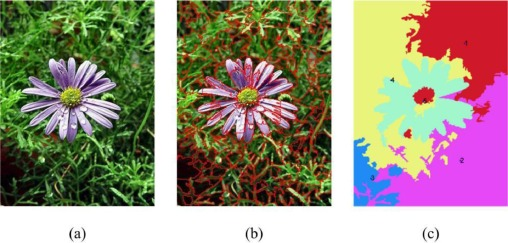

#### **1.3. Tiềm năng song song hoá**



*   **Lý do tăng tốc**: Tốc độ thực thi trên thuật toán tuần tự rất chậm.


- **Tiềm năng song song**:
    Số lượng pixel ảnh lớn và được xử lí độc lập nhau.

### **2. Cài đặt thuật toán tuần tự**

#### **2.1. Thiết kế**

##### **2.1.1. Thuật toán phân cụm - K-means Algorithm**

![alt](https://3.bp.blogspot.com/-NMrDyo4_ySg/XDqlicW58WI/AAAAAAAAERI/bWXciHyrL_UzlGV2JSkB3D3iCKTtKnyYACLcBGAs/s1600/main.jpg)

- K-Means là thuật toán rất quan trọng và được sử dụng phổ biến trong kỹ thuật phân cụm. 

- Tư tưởng chính của thuật toán K-Means là tìm cách phân nhóm các đối tượng (objects) đã cho vào K cụm (K là số các cụm được xác định trước, K nguyên dương) sao cho tổng bình phương khoảng cách giữa các đối tượng đến tâm nhóm (centroid ) là nhỏ nhất.

##### **2.1.2. Xác định tham số K bằng phương pháp Elbow**

SSE được tính là tổng các khoảng cách tính từ các điểm trong cluster đến điểm trung tâm Centroid của cluster, tính tất cả các cluster, dựa theo công thức Euclidean

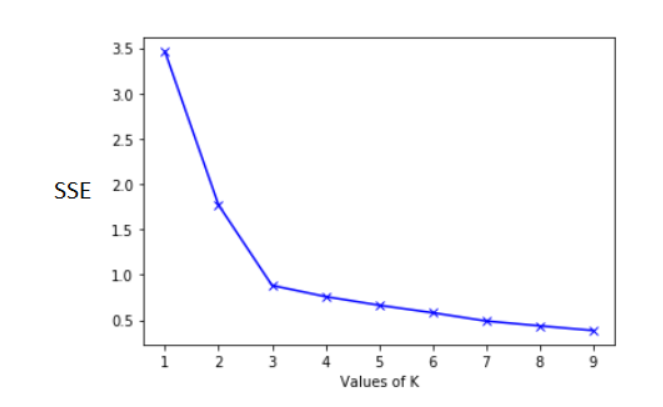

- Giải thích: Elbow method dựa trên giả định khi càng có nhiều cluster, thì có nghĩa các điểm dữ liệu giống nhau đã được gom cụm, mỗi cụm sẽ chỉ có ít điểm dữ liệu bên trong, và những điểm này sẽ ko nằm xa nhau, do đó SSE sẽ giảm, khi k tăng. Tuy nhiên khi k càng tăng chúng ta sẽ càng có nhiều cluster cần phân tích, dẫn đến không hiệu quả. Do đó chúng ta nên chon số k mà ở đó SSE bắt đầu giảm đều. Đây được xem là quy tắc chung khi sử dụng elbow method.

- Do việc áp dụng Elbow để xác định số K cụm của ảnh tốn rất nhiều thời gian nên nhóm đã áp dụng 2 phương pháp để nhằm tối ưu hoá giảm thời gian của phương pháp Elbow:

    Phương pháp 1: Giảm kích thước ảnh: ảnh được giảm về độ phân giải phù hợp để tăng tốc quá trình phần vùng ảnh

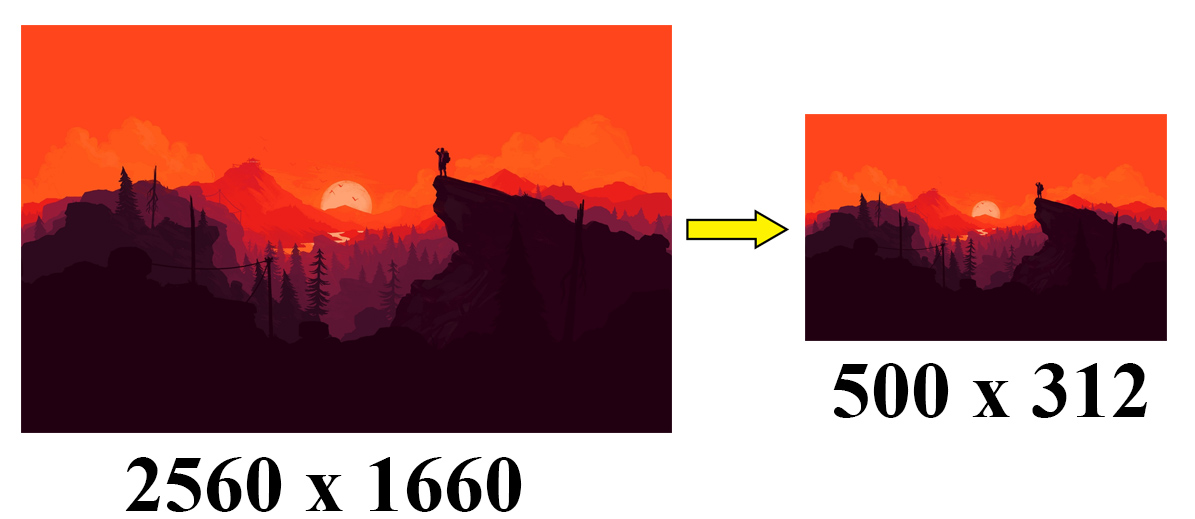

    Phương pháp 2: Đặt ngưỡng khi tìm ra hệ số K thích hợp: khi thấy hệ số SSE bắt đầu giảm đều thì ta sẽ dừng việc tính SSE lại và chọn hệ số K ngay lúc này. Việc này giúp ta kết thúc sớm quá trình tính SSE của ảnh không cần chờ đến khi k = 10. Công thức cụ thể được trình bài ở dưới mục Phụ lục

#### **2.2. Cài đặt thuật toán:**

##### **2.2.1. Phân đoạn ảnh**

- **Bước 1**: Khởi tạo K tâm của K vùng là các pixels ngẫu nhiên.
- **Bước 2**: Phân mỗi pixels vào cluster có tâm gần nó nhất. (Khoảng cách Euclid nhỏ nhất).
- **Bước 3**: Nếu việc gán dữ liệu vào từng cluster ở bước 2 không thay đổi so với vòng lặp trước nó thì ta dừng thuật toán.
- **Bước 4**: Cập nhật tâm cho từng cluster bằng cách lấy trung bình cộng của tất các các điểm ảnh pixels đã được gán vào cluster đó sau bước 2.
- **Bước 5**: Quay lại bước 2

##### **2.2.2. Phân đoạn video**

a. Phân tách 1 video thành nhiều frame ảnh

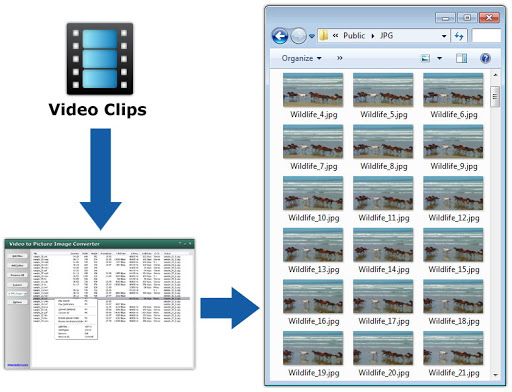

b. Xử lý phân vùng cho từng ảnh riêng lẻ

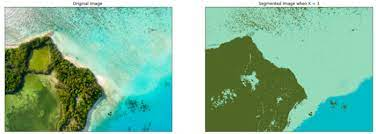

c. Gộp các ảnh lại để thành 1 video hoàn chỉnh

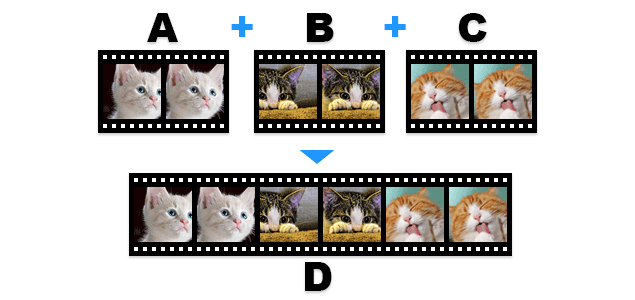

##### **2.2.3. Áp dụng Elbow tìm hệ số K trong phân đoạn video**

- Sử dụng phương pháp SSIM để so sánh lần lượt từng cặp frame ảnh liền kề trong video lại với nhau nếu hệ số SSIM cho ra nhỏ thể hiện sự khác biệt giữa 2 ảnh thì bắt đầu tính lại hệ số K từ đó

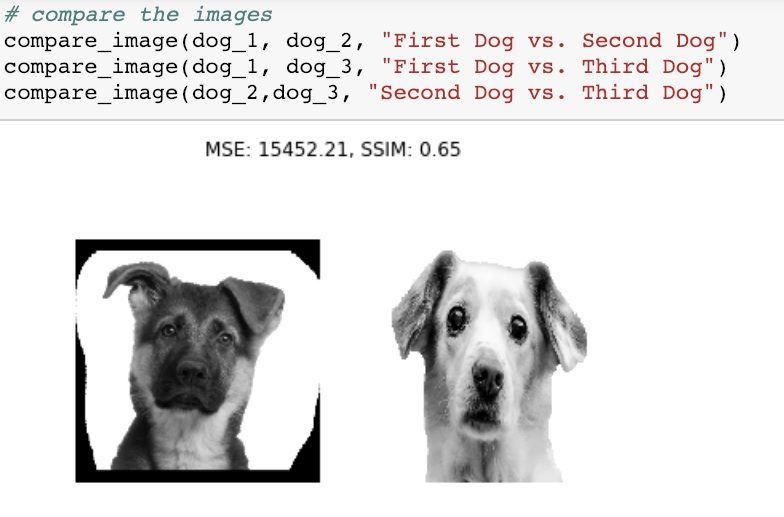

Source: https://towardsdatascience.com/image-classification-using-ssim-34e549ec6e12

#### **2.3. Kết quả**

##### **2.2.1. Phân đoạn ảnh**

- Ảnh input: kích thước 2560 x 1660

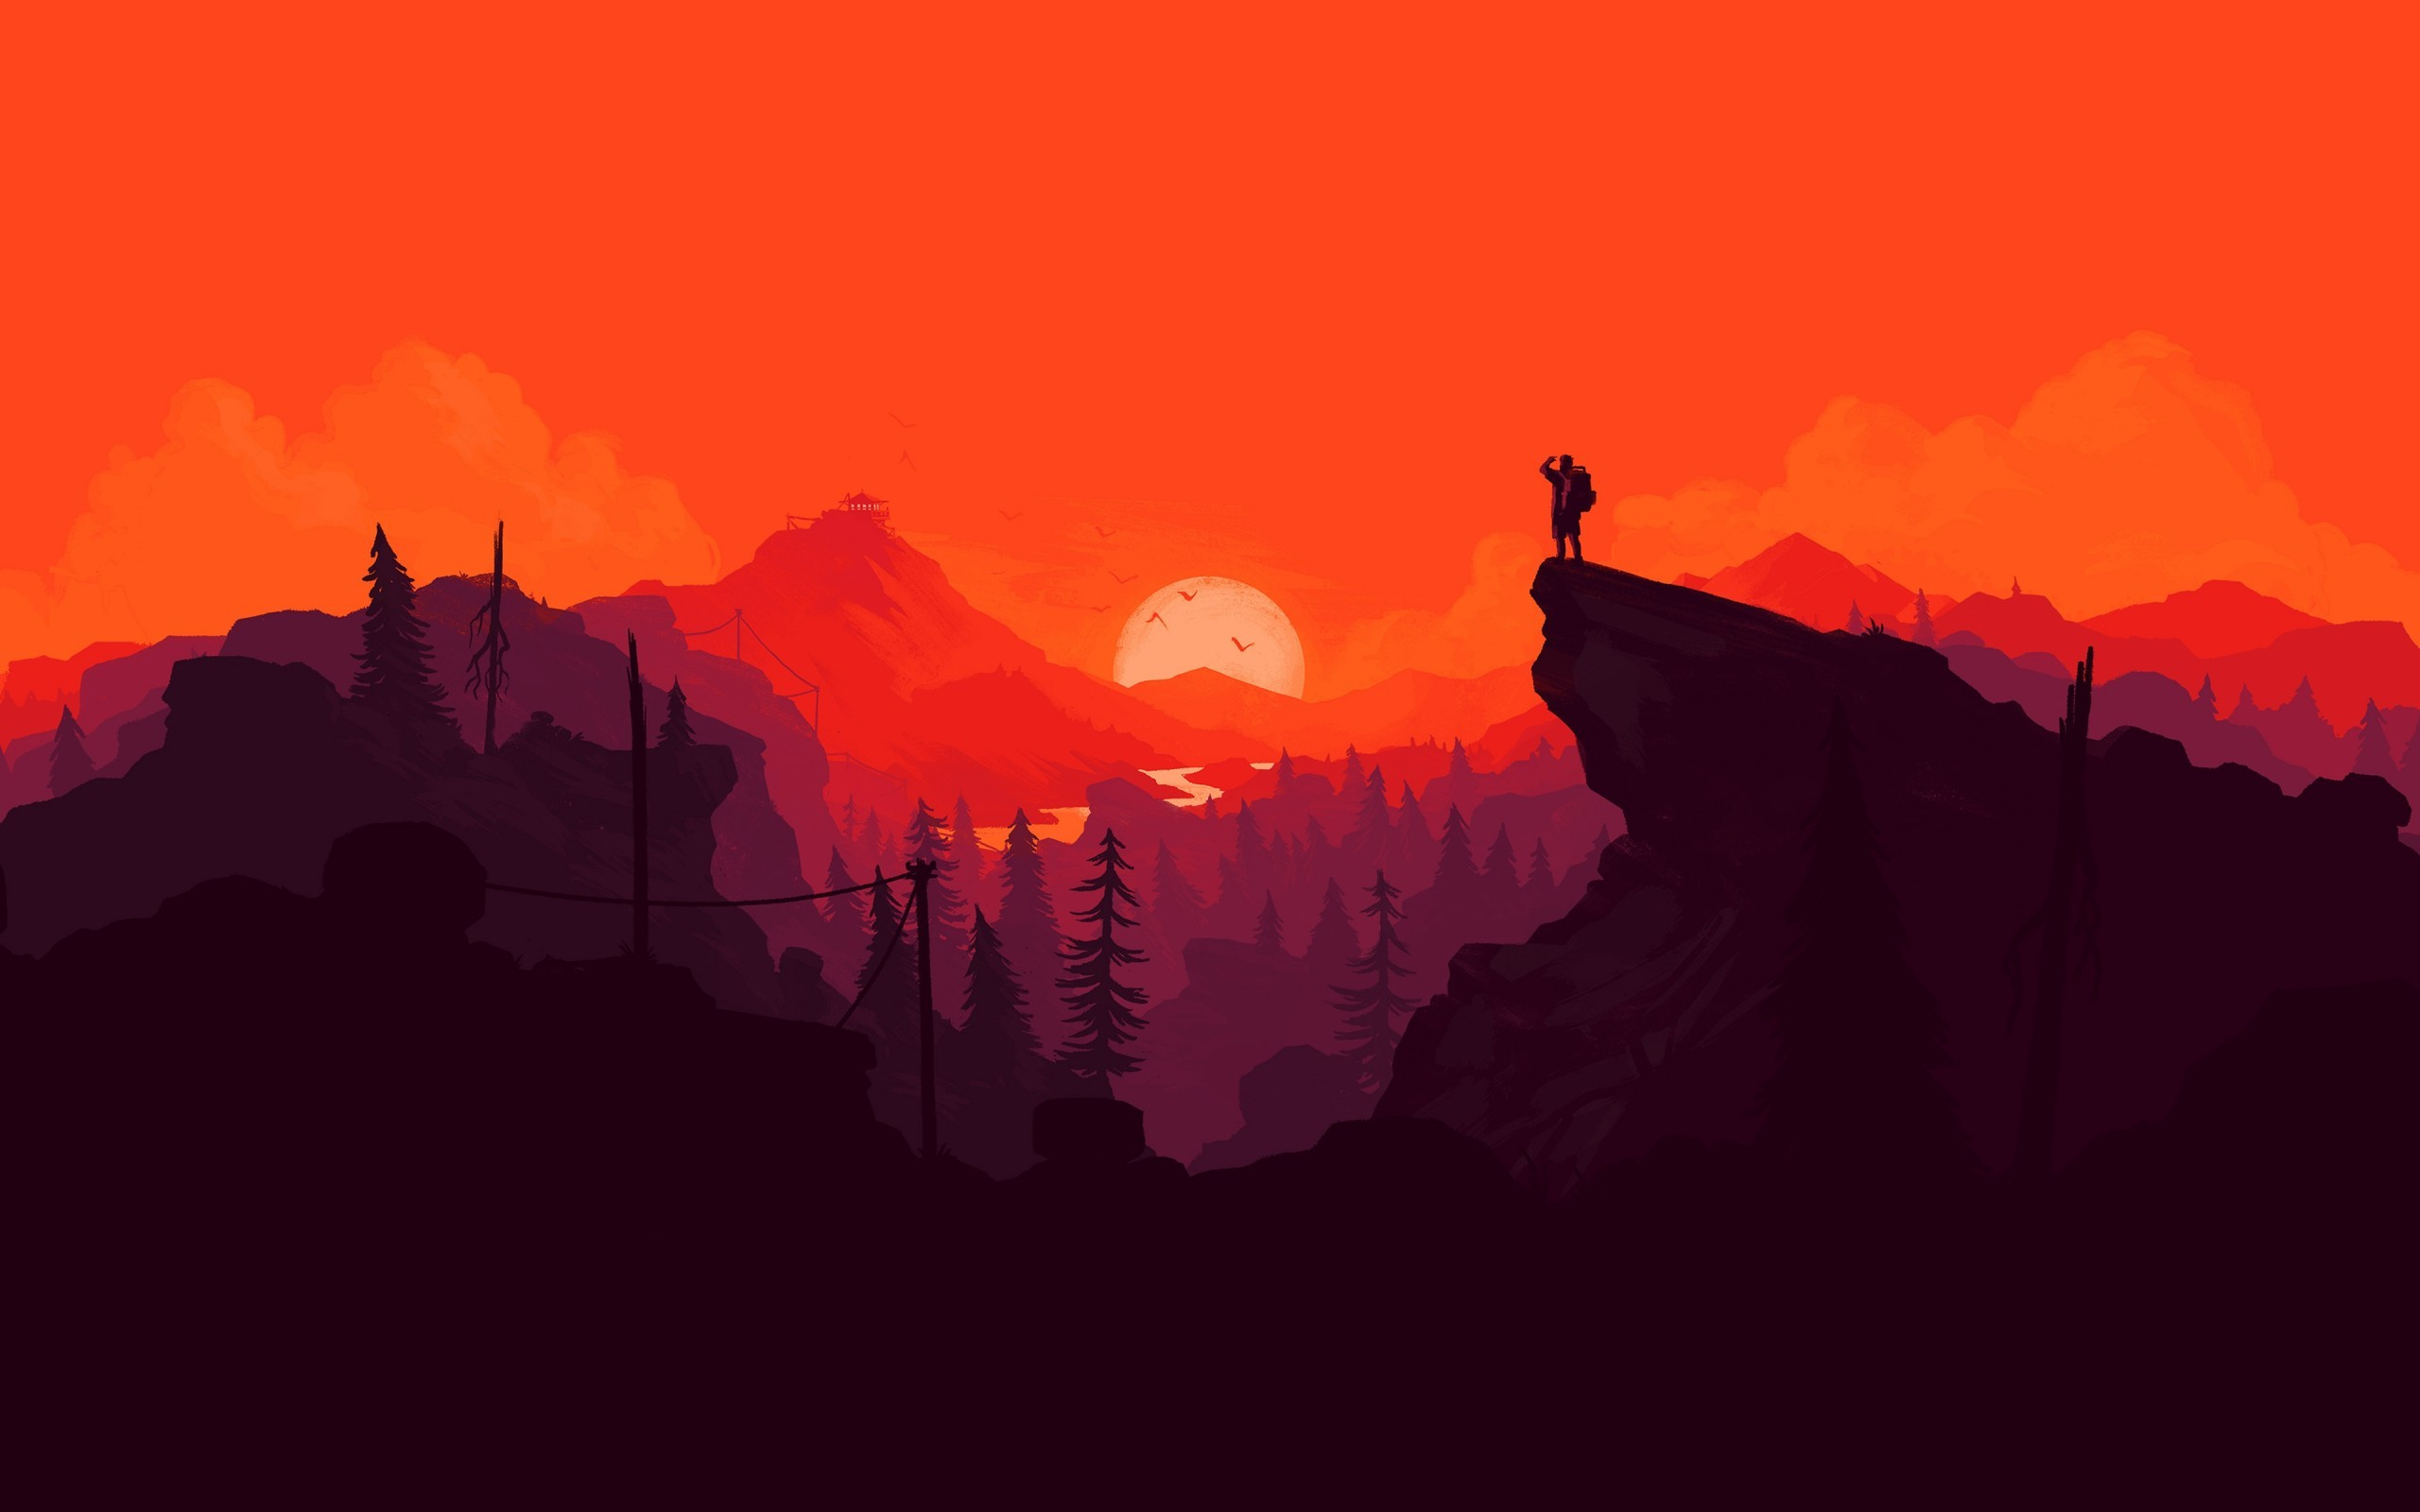

Source: *https://www.wallpapermaiden.com/wallpaper/23908/flat-landscape-illustration-sunset-cliff-man-hiking-red-sky-digital-art/download/2560x1600*

- Biểu đồ thể hiện SSE với k từ 1 đến 10

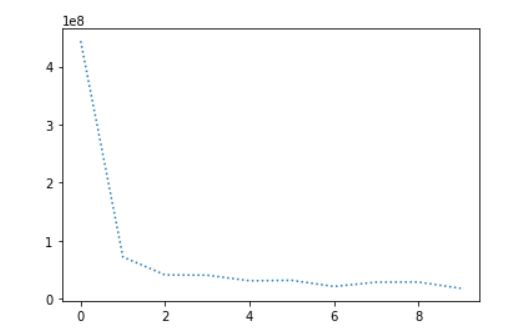

In [1]:
!python Elbow.py test.jpg

3
--- 11.675646781921387 seconds ---


- Thời gian để xử lí hàm Elbow là 11.6 giây

- Ảnh xử lí bằng thư viện OpenCV với thuật toán Kmeans và tham số k = 3.

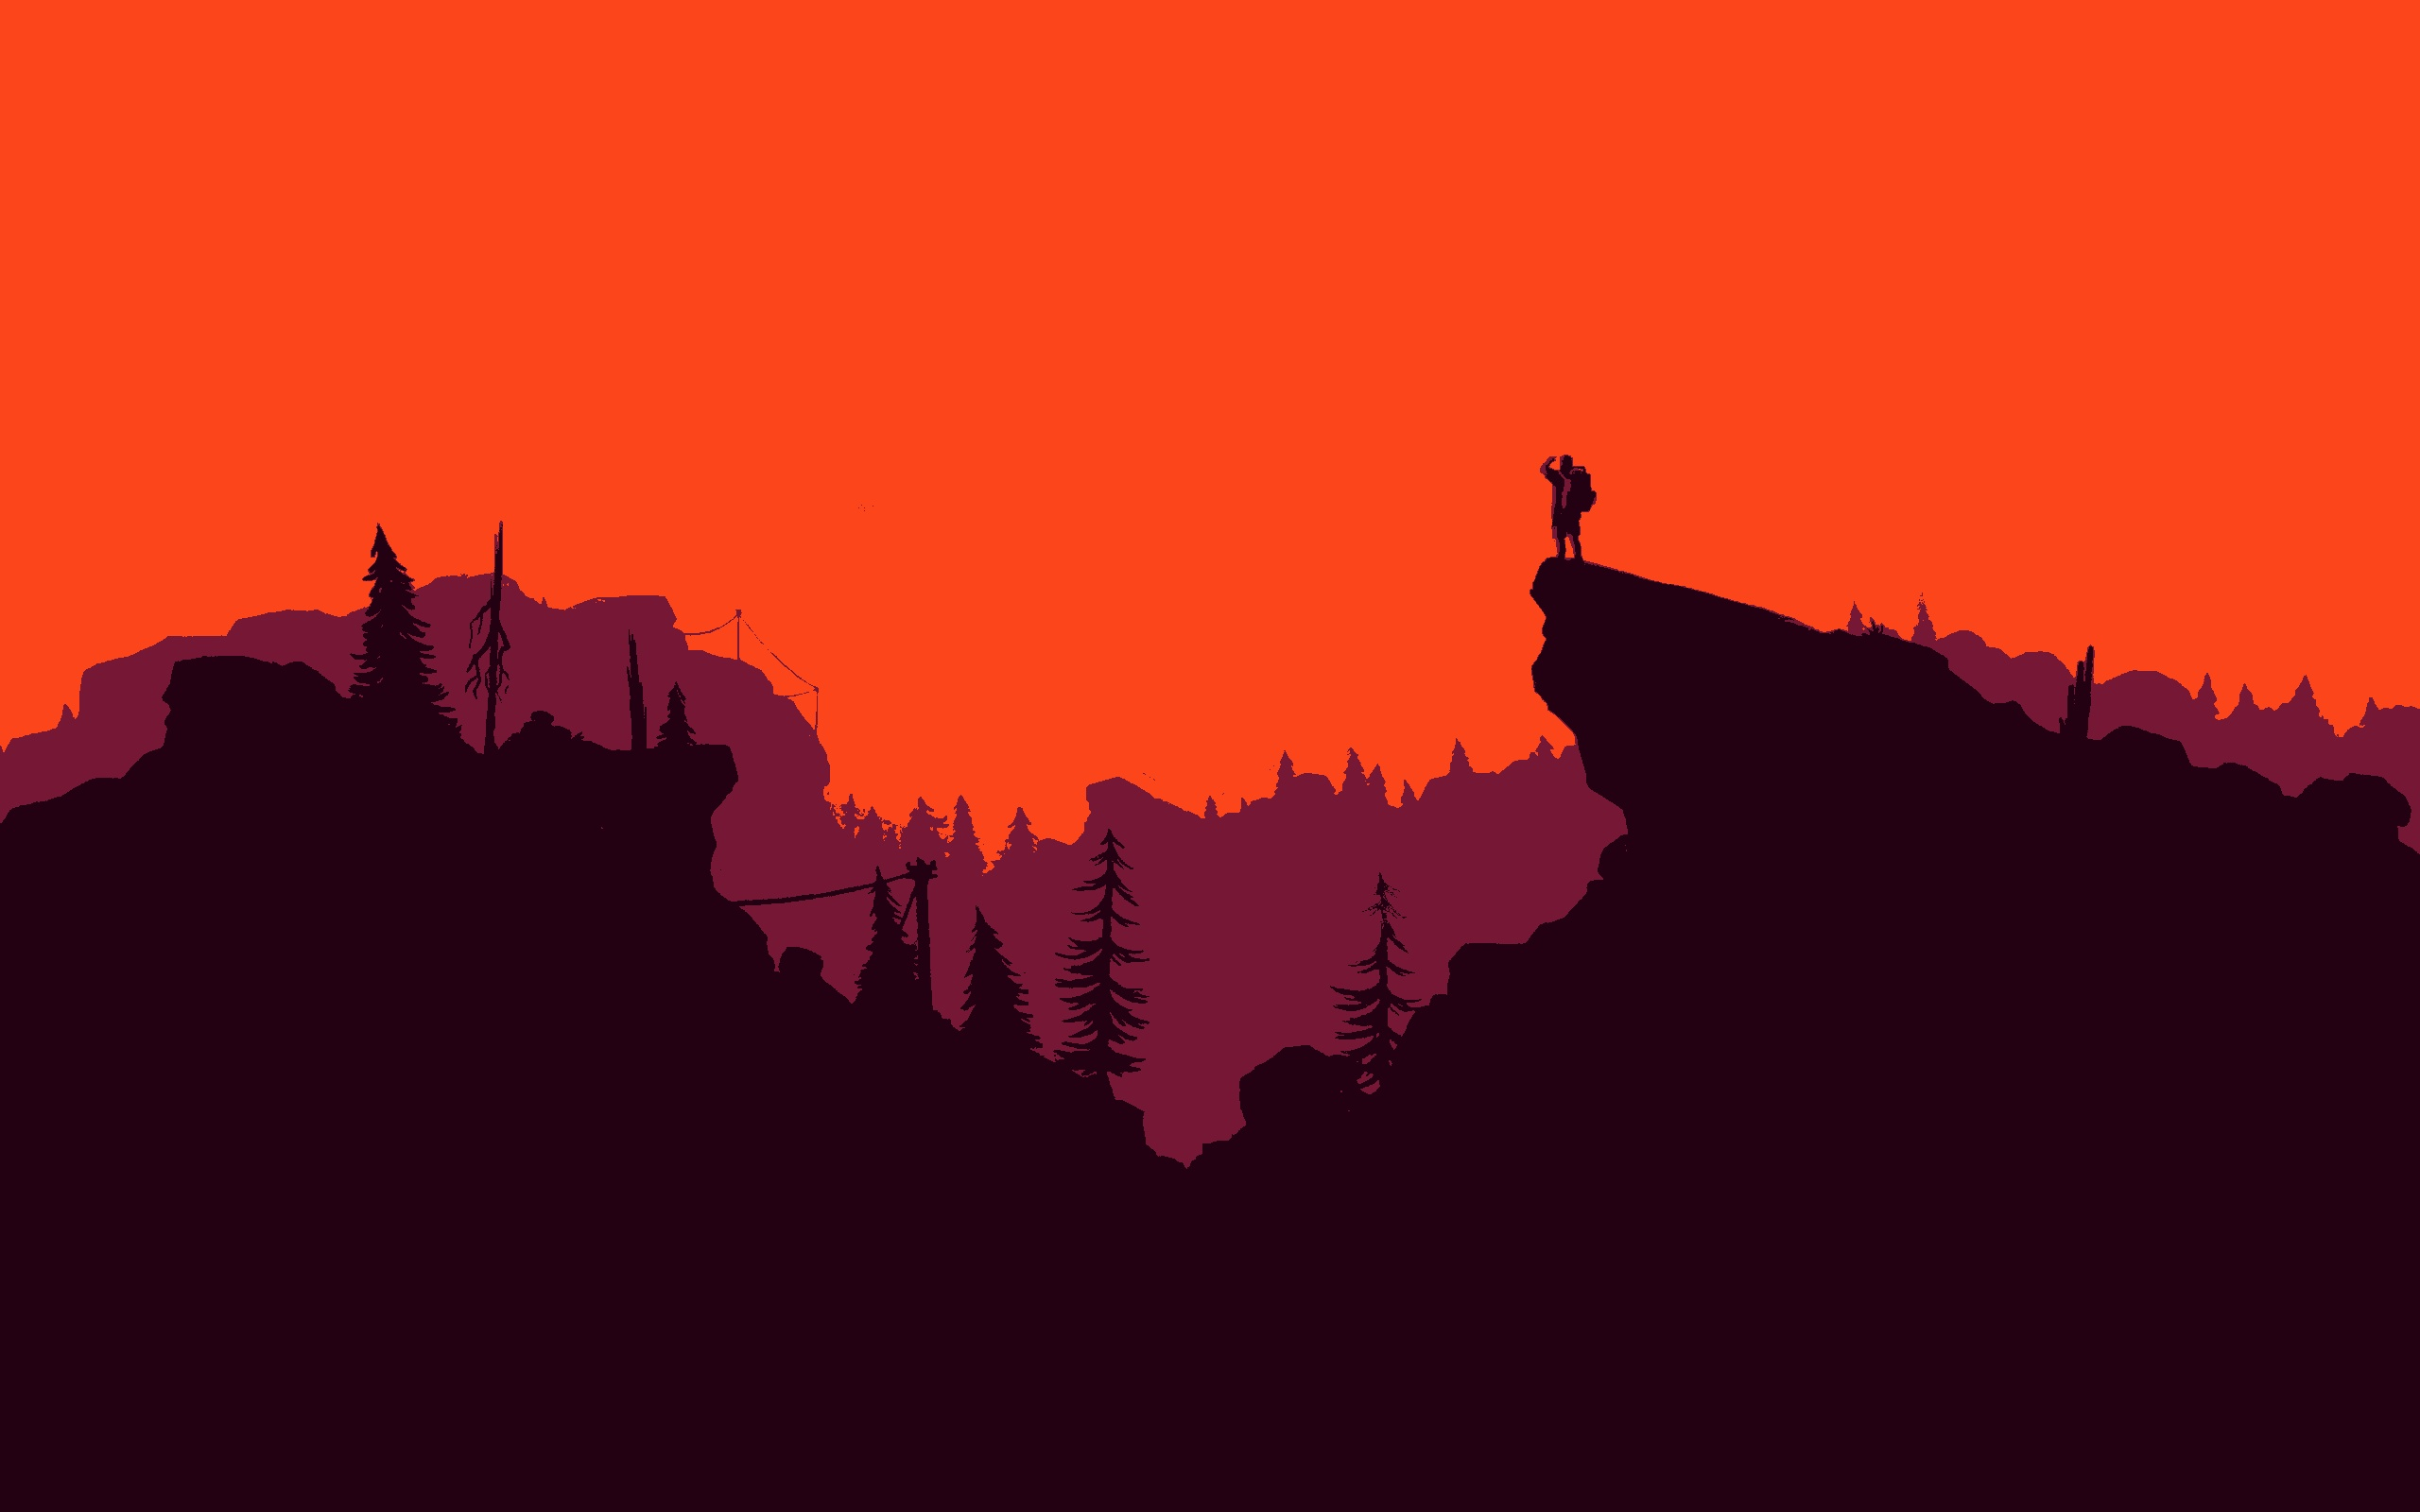


In [5]:
!python Segmentation_Image_Kmean_Sequential.py test.jpg -k 3 output_seq.jpg

--- Choose Time: 1.3425006866455078 seconds ---
--- ReChoose Time: 46.68009424209595 seconds ---
--- 49.094990253448486 seconds ---


- Sau khi áp dụng thuật toán Kmeans với k = 3, thời gian xử lí 49 giây ( hàm Choose_Centroid: 1.34 giây, hàm ReChoose_Centroid: 46.6 giây ) 

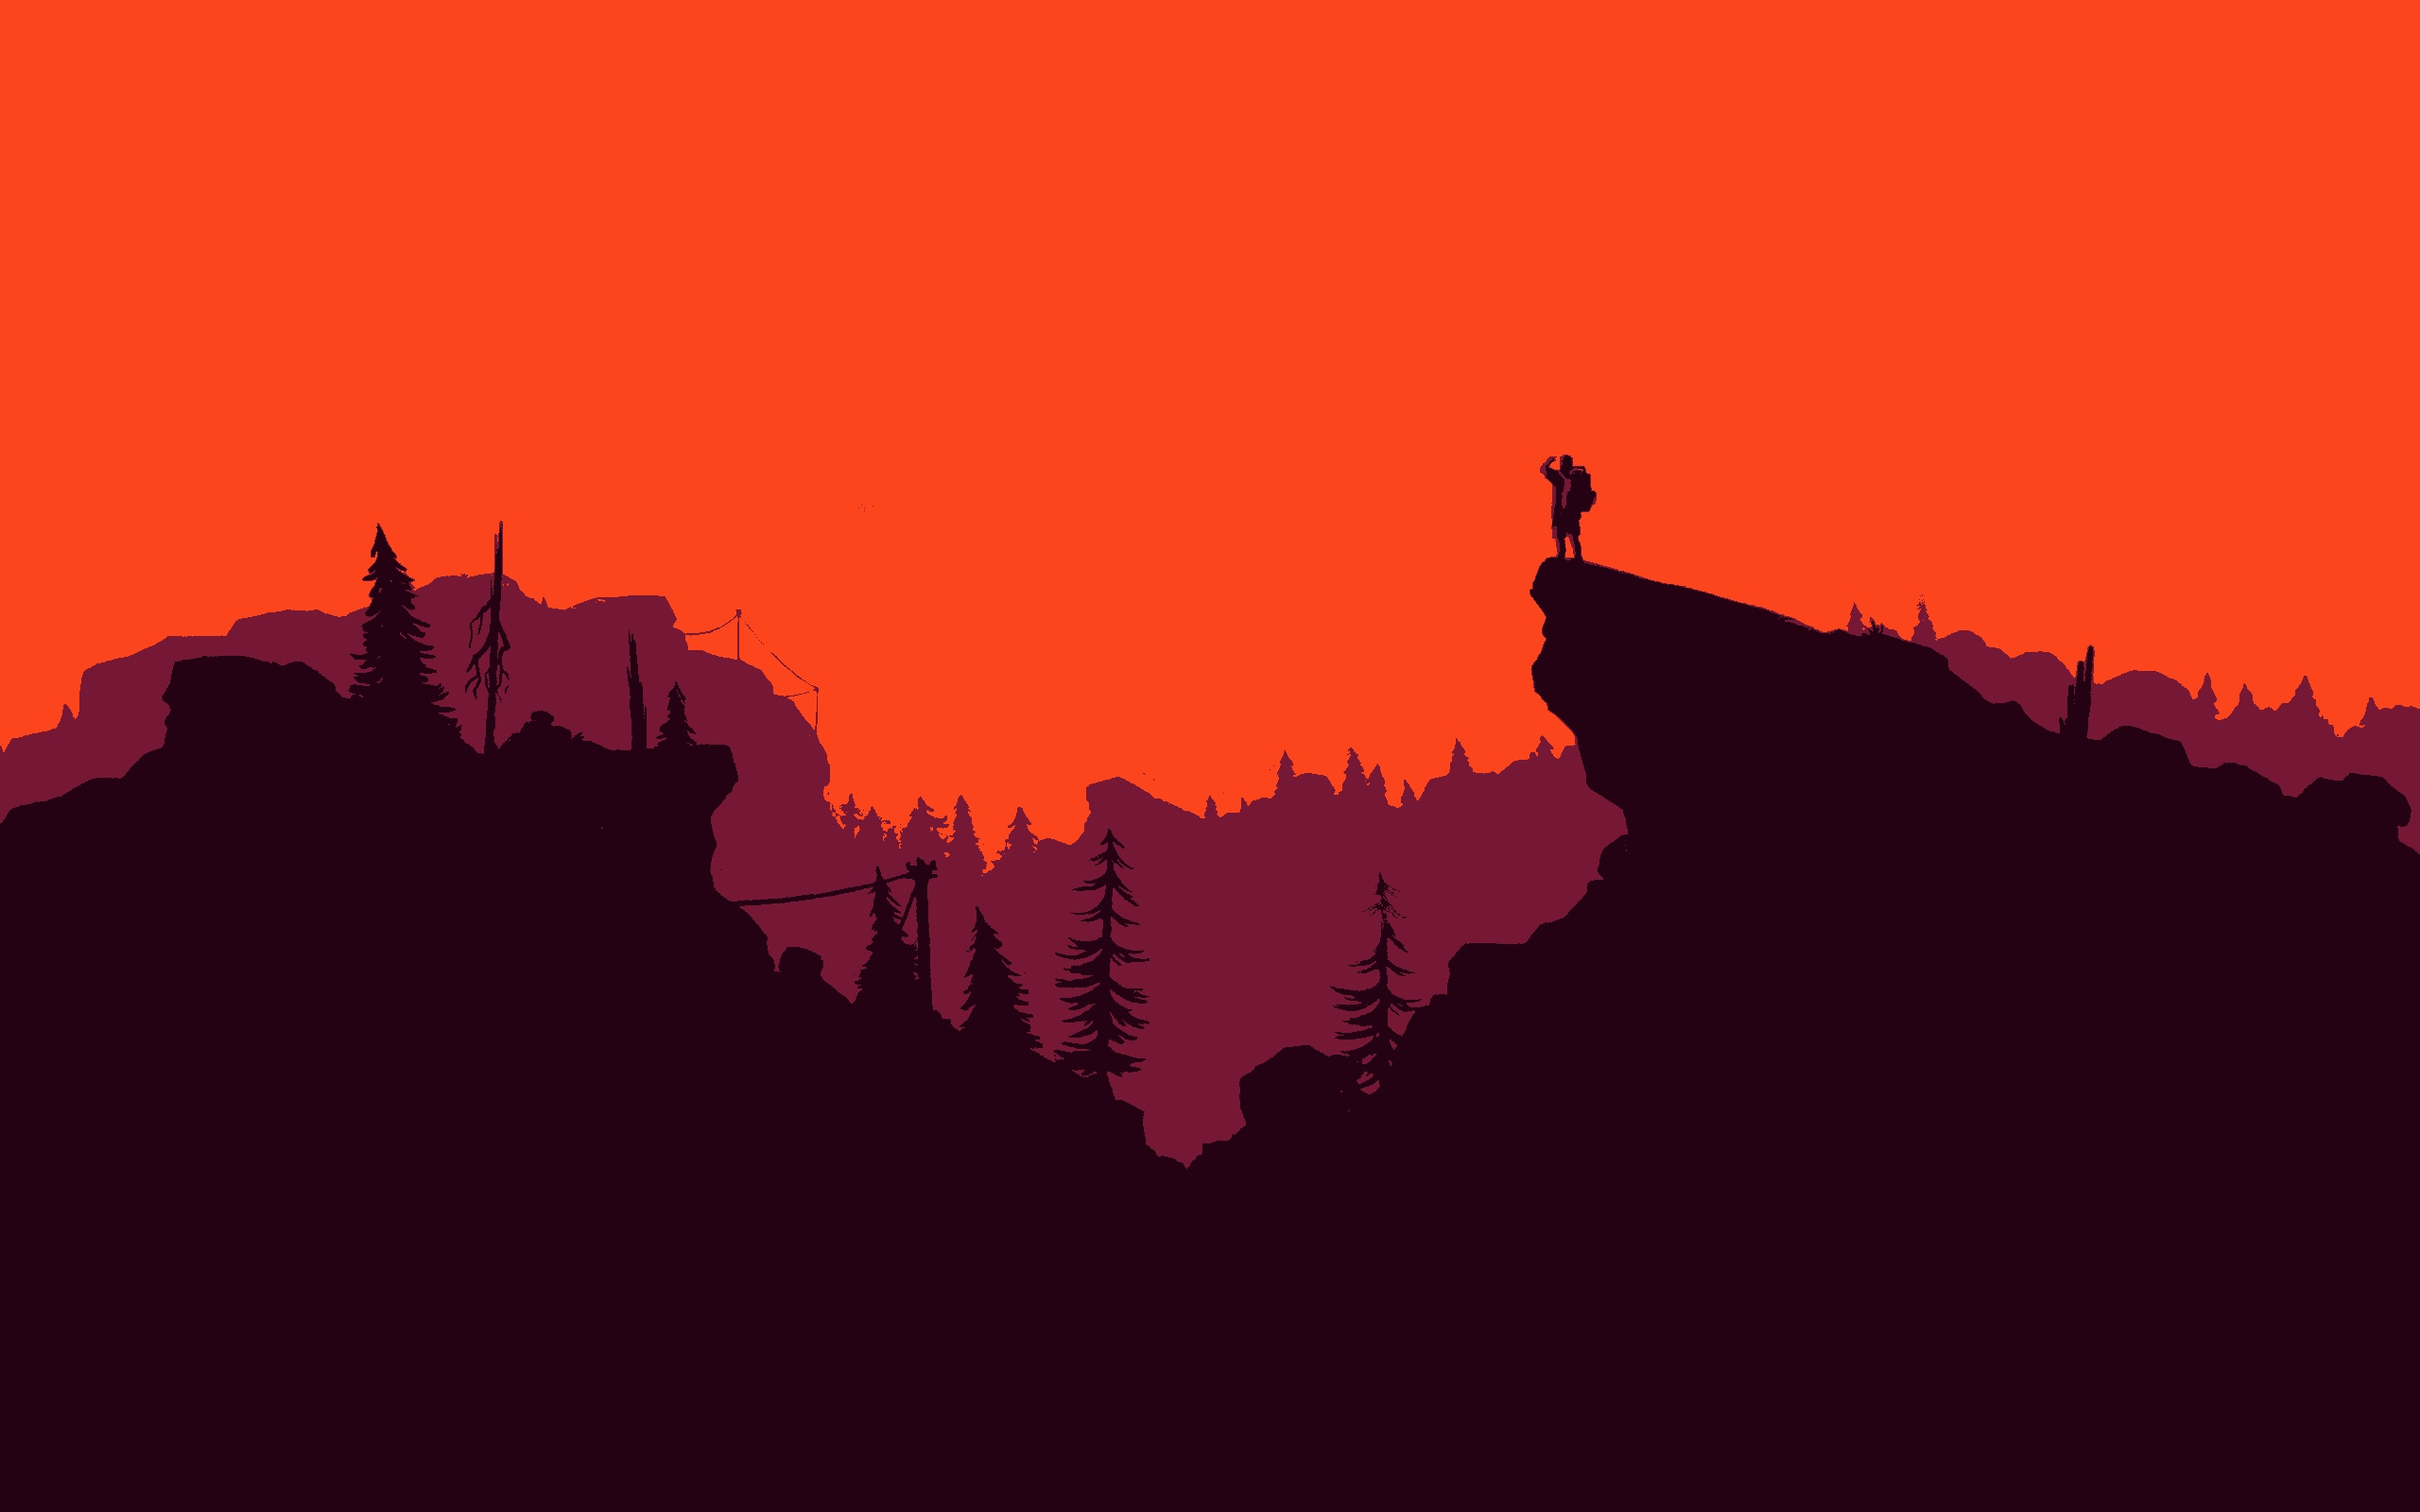


- Đánh giá độ sai lệch của ảnh xử lí của nhóm so với thư viện OpenCV

In [9]:
!python SSIM.py opencv.jpg output_seq.jpg

0.9848533711325521


- Độ sai lệch của ảnh so với thuật toán của OpenCV là 0.02

##### **2.2.2. Phân đoạn video**

**Video input**: 
*   Độ dài khoảng 7 giây 
*   Kích thước 1920 x 1080 (FULL HD)
*   14 frames/s (106 ảnh)

**Kết quả áp dụng thuật toán tuần tự trên video:**

Sau khi áp dụng thuật toán Kmeans với k được tính tự động bằng Elbow, thời gian xử lý 2153 giây (gần 36 phút, Elbow được tính 2 lần - 1 lần ở frame đầu tiên và 1 lần ở frame thứ 51)

In [3]:
!python Segmentation_Image_Kmean_Sequential.py demo.mp4 -k elbow ouput.mp4

[51]
---- Number of Cluster: 2 ------
------Complete 0------
------Complete 1------
------Complete 2------
------Complete 3------
------Complete 4------
------Complete 5------
------Complete 6------
------Complete 7------
------Complete 8------
------Complete 9------
------Complete 10------
------Complete 11------
------Complete 12------
------Complete 13------
------Complete 14------
------Complete 15------
------Complete 16------
------Complete 17------
------Complete 18------
------Complete 19------
------Complete 20------
------Complete 21------
------Complete 22------
------Complete 23------
------Complete 24------
------Complete 25------
------Complete 26------
------Complete 27------
------Complete 28------
------Complete 29------
------Complete 30------
------Complete 31------
------Complete 32------
------Complete 33------
------Complete 34------
------Complete 35------
------Complete 36------
------Complete 37------
------Complete 38------
------Complete 39------
------Comple

### **3. Cài đặt thuật toán song song**

#### **3.1. Thiết kế**

##### **3.1.1. Song song hoá hàm Choose_Centroid**

- Mỗi thread sẽ xử lý 1 pixel ảnh trong hình để thực hiện tính khoảng cách pixel đến từng Centroid. Từ đó xét xem pixel đang xét sẽ thuộc Centroid nào.
- Threads per block là: (32, 32).

##### **3.1.2. Song song hóa hàm ReChoose_Centroid**

- Ở hàm ReChoose_Centroid sẽ lần lượt thực hiện việc tính tổng số lượng màu của kênh R, kênh G, kênh B và sau đó tính tổng số pixel cuả từng kênh để thực hiện việc chia lấy trung bình. Nếu làm tuẩn từ thì sẽ phải theo 6 bước ta có thể thực hiện song song 6 bước này thành 1
- Threads per block là: 6.

##### **3.1.3. Song song hóa việc tính SSE của hàm Elbow**

- Mỗi thread sẽ xử lý 1 pixel ảnh trong hình để thực hiện tính khoảng cách giữa ảnh đã xử lí và ảnh gốc. Nhưng thay vì làm như bình thường ta sẽ sử dụng Multi-stream để tăng tốc và tối ưu hoá việc song song 
- Việc áp dụng multi-stream chương trình sẽ tách lượng lớn các pixel cần xử lí thành các stream(luồng) và làm tuần tự nhiệm vụ: Sao chép - Tính toán - Trả kết quả. Bởi vì việc Sao chép và Tính toán là không ảnh hưởng đến nhau nên ta có thể là đồng thời 2 việc này
- Threads per block: (32,32)
- Số lượng stream: 5

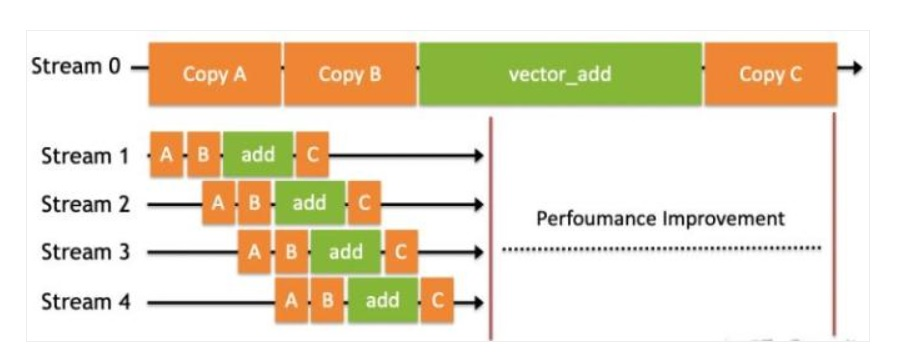


Ảnh minh hoạ Multi-stream. Source: https://www.programmersought.com/article/82114808808/

#### **3.2. Kết quả**

##### **3.2.1. Phân đoạn ảnh**

**Ảnh input**: kích thước 2560 x 1660

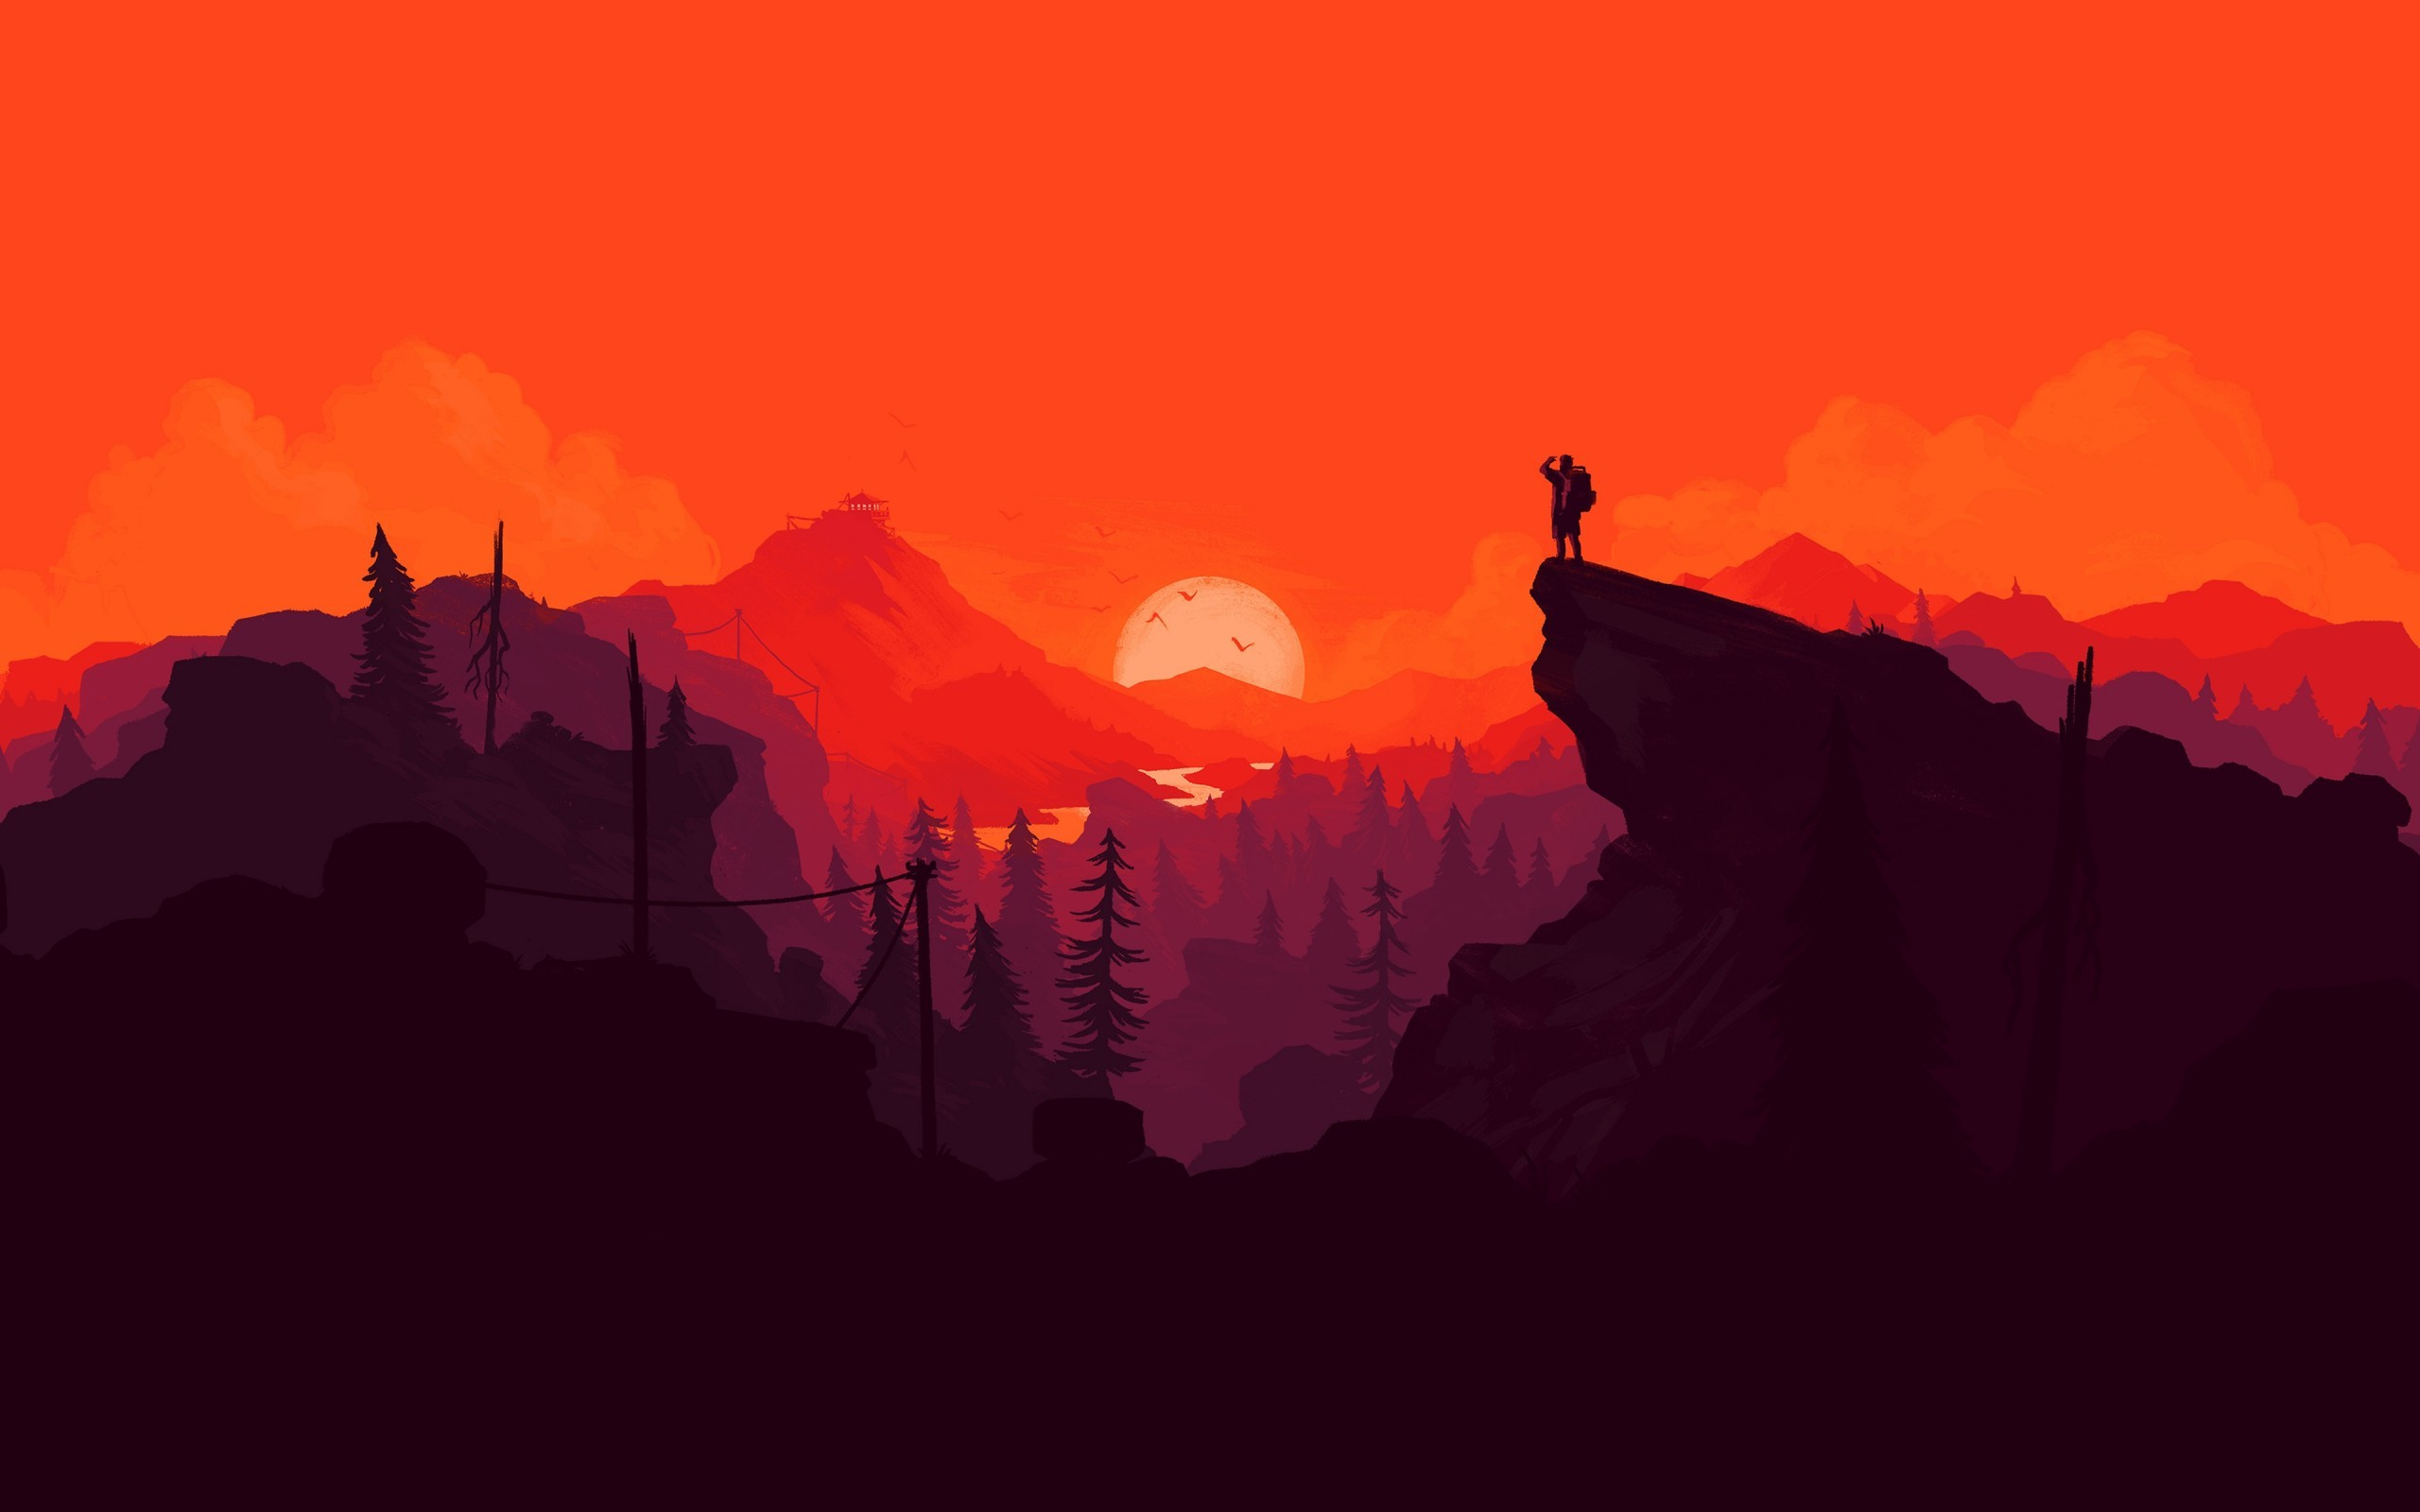


In [6]:
!python Elbow_Parallel.py test.jpg

--- 3.5820746421813965 seconds ---


In [7]:
!python Segmentation_Image_Kmean_Parrallel.py test.jpg -k 3 output_parrallel.jpg

--- Choose Time: 0.43203091621398926 seconds ---
--- ReChoose Time: 10.539742469787598 seconds ---
--- 13.340616226196289 seconds ---


**Thời gian thực thi**

*   Hàm Choose_Centroid
    
    + Tốc độ thực thi hàm trên thuật toán tuần tự: 1 giây
    + Tốc độ thực thi hàm trên thuật toán song song: 0.43 giây
    

*   Hàm ReChoose_Centroid

    + Tốc độ thực thi hàm trên thuật toán tuần tự: 40 giây
    + Tốc độ thực thi hàm trên thuật toán song song: 10.5 giây
    
    
*   Hàm Elbow

    + Tốc độ thực thi hàm trên thuật toán tuần tự: 11.6 giây
    + Tốc độ thực thi hàm trên thuật toán song song: 3.58 giây


**Kết quả**

- Thời gian xử lí 13.34 giây ( hàm Choose_Centroid: 0.43 giây, hàm ReChoose_Centroid: 10.5 giây ) nhanh hơn 3.7 lần so với tuần tự 

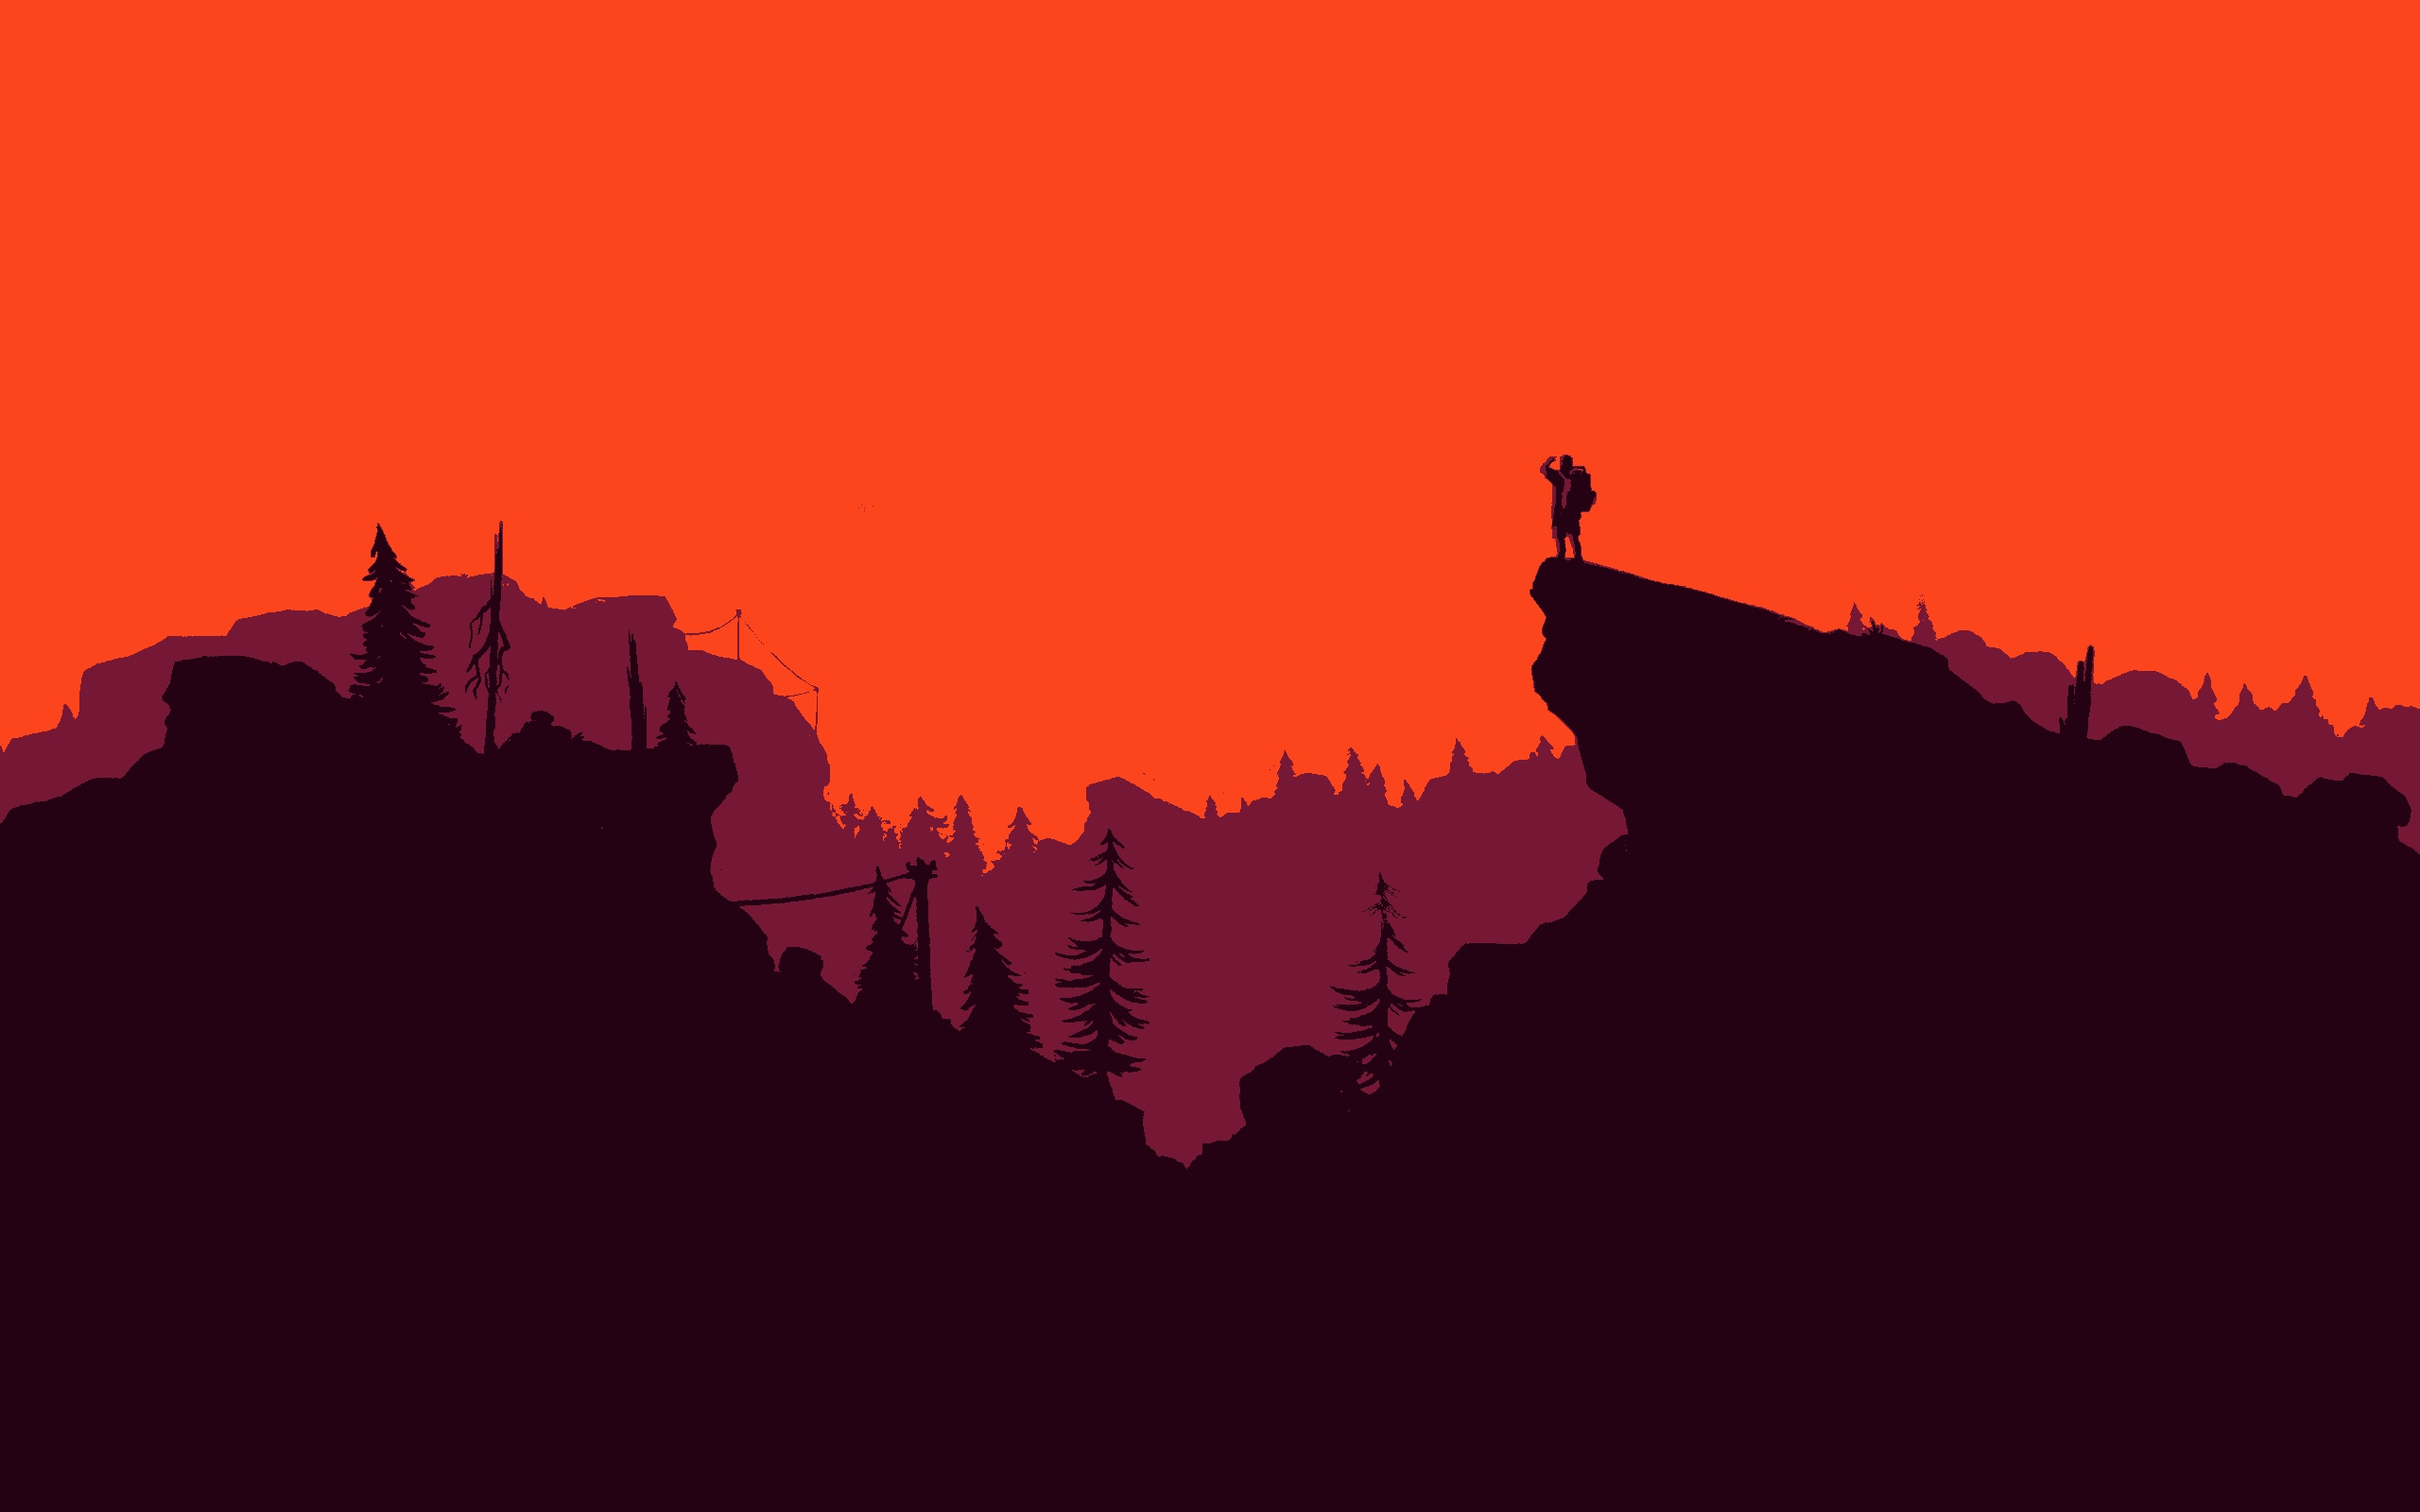


##### 3.2.2. Phân đoạn video

**Video input**: 
*   Độ dài khoảng 7 giây 
*   Kích thước 1920 x 1080 (FULL HD)
*   14 frames/s (106 ảnh)

**Kết quả áp dụng thuật toán đã được song song hoá trên video:**

Sau khi áp dụng thuật toán Kmeans với k được tính tự động bằng Elbow, thời gian xử lý 692 giây (gần 11.5 phút, Elbow được tính 2 lần - 1 lần ở frame đầu tiên và 1 lần ở frame thứ 51) nhanh hơn 3.5 lần so với tuần tự

In [1]:
!python Segmentation_Image_Kmean_Parrallel.py demo.mp4 -k elbow ouput.mp4

[51]
---- Number of Cluster: 2 ------
------Complete 0------
------Complete 1------
------Complete 2------
------Complete 3------
------Complete 4------
------Complete 5------
------Complete 6------
------Complete 7------
------Complete 8------
------Complete 9------
------Complete 10------
------Complete 11------
------Complete 12------
------Complete 13------
------Complete 14------
------Complete 15------
------Complete 16------
------Complete 17------
------Complete 18------
------Complete 19------
------Complete 20------
------Complete 21------
------Complete 22------
------Complete 23------
------Complete 24------
------Complete 25------
------Complete 26------
------Complete 27------
------Complete 28------
------Complete 29------
------Complete 30------
------Complete 31------
------Complete 32------
------Complete 33------
------Complete 34------
------Complete 35------
------Complete 36------
------Complete 37------
------Complete 38------
------Complete 39------
------Comple

### 5. Thảo luận

### 6. Phụ lục

#### 6.1. Công thức

##### 6.1.1. Công thức Euclidean



 $$d(p,q)   = \sqrt[]{\sum^m_{i=1}\,(x_i - y_j)^2}$$

##### 6.1.2. Công thức Elbow

 $$SSE =\sum^k_{i=1}\sum^{n_j}_{j=1}\,Distance^2(x_{ij}, m_i)$$	


##### 6.1.3. Công thức xác định ngưỡng dừng việc tính SSE

 $$\frac{SSE{i} - SSE_{i+1}}{SSE_{i+1} - SSE_{i+2}} \leq 1.4  $$

##### 6.1.4. Công thức xác định độ khác nhau giữa 2 ảnh SSIM

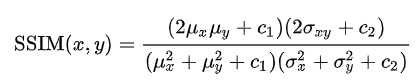


$$SSIM \leq 0.65  $$

#### 6.2. Tham khảo

[1]. https://www.researchgate.net/publication/276040112_Parallel_K-Means_Algorithm_for_Shared_Memory_Multiprocessors

[2]. https://qastack.vn/stats/81481/why-does-k-means-clustering-algorithm-use-only-euclidean-distance-metric

[3]. https://bigdatauni.com/tin-tuc/cac-phuong-phap-danh-gia-trong-thuat-toan-clustering.html

[4]. https://en.wikipedia.org/wiki/Structural_similarity